In [ ]:
# 3. In this problem, you will perform K-means clustering manually, with
# K = 2, on a small example with n = 6 observations and p = 2
# features. The observations are as follows.
# Obs. X1 X2
# 1 1 4
# 2 1 3
# 3 0 4
# 4 5 1
# 5 6 2
# 6 4 0
# (a) Plot the observations.

In [1]:
x1 = c(1,1,0,5,6,4)
x2 = c(4,3,4,1,2,0)
X= cbind(x1,x2)
X

x1,x2
1,4
1,3
0,4
5,1
6,2
4,0


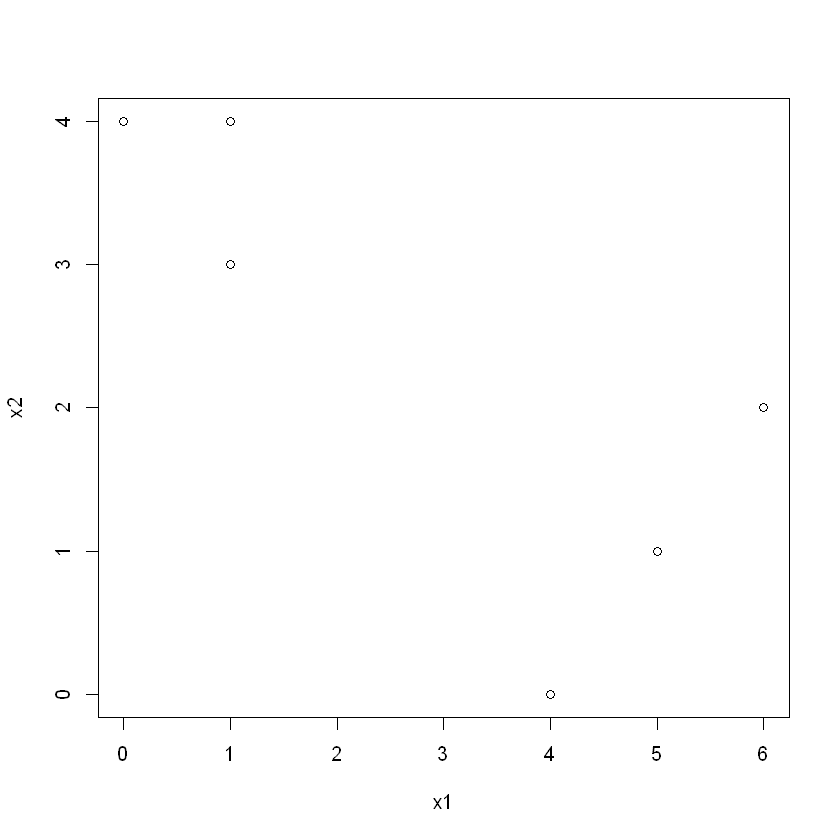

In [6]:
plot(x1,x2)

In [ ]:
# (b) Randomly assign a cluster label to each observation. You can
# use the sample() command in R to do this. Report the cluster
# labels for each observation.

In [13]:
cluster = sample(2,6,replace=TRUE)
cluster

[1] 2 1 2 1 1 2

In [ ]:
# (c) Compute the centroid for each cluster.

In [17]:
metroid1= c(mean(X[cluster==1,1]),mean(X[cluster==1,2]))
metroid2= c(mean(X[cluster==2,1]),mean(X[cluster==2,2]))
print(metroid1)
print(metroid1)

[1] 4 2
[1] 4 2


In [ ]:
# (d) Assign each observation to the centroid to which it is closest, in
# terms of Euclidean distance. Report the cluster labels for each
# observation.

In [ ]:
Euc_distance <- function (x, y){
  return(sqrt((x[1] - y[1])^2 + (x[2] - y[2])^2))
}

#https://www.guru99.com/r-k-means-clustering.html

In [ ]:
# 8. In Section 10.2.3, a formula for calculating PVE was given in Equation
# 10.8.We also saw that the PVE can be obtained using the sdev
# output of the prcomp() function.
# On the USArrests data, calculate PVE in two ways:
# (a) Using the sdev output of the prcomp() function, as was done in
# Section 10.2.3.

In [21]:
library(ISLR)
pr.out = prcomp(USArrests, center=TRUE, scale=TRUE)
pr.var = pr.out$sdev^2
pve = pr.var / sum(pr.var)
pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

In [ ]:
# (b) By applying Equation 10.8 directly. That is, use the prcomp()
# function to compute the principal component loadings. Then,
# use those loadings in Equation 10.8 to obtain the PVE.


In [22]:
loadings <- pr.out$rotation
USArrests2 <- scale(USArrests)
sumvar <- sum(apply(as.matrix(USArrests2)^2, 2, sum))
apply((as.matrix(USArrests2) %*% loadings)^2, 2, sum) / sumvar

#https://rstudio-pubs-static.s3.amazonaws.com/344683_ffdcd5cb801c4170a25f6cf1e72e300d.html

PC1        PC2        PC3        PC4 
0.62006039 0.24744129 0.08914080 0.04335752

In [ ]:
# 9. Consider the USArrests data. We will now perform hierarchical clustering
# on the states.
# (a) Using hierarchical clustering with complete linkage and
# Euclidean distance, cluster the states.

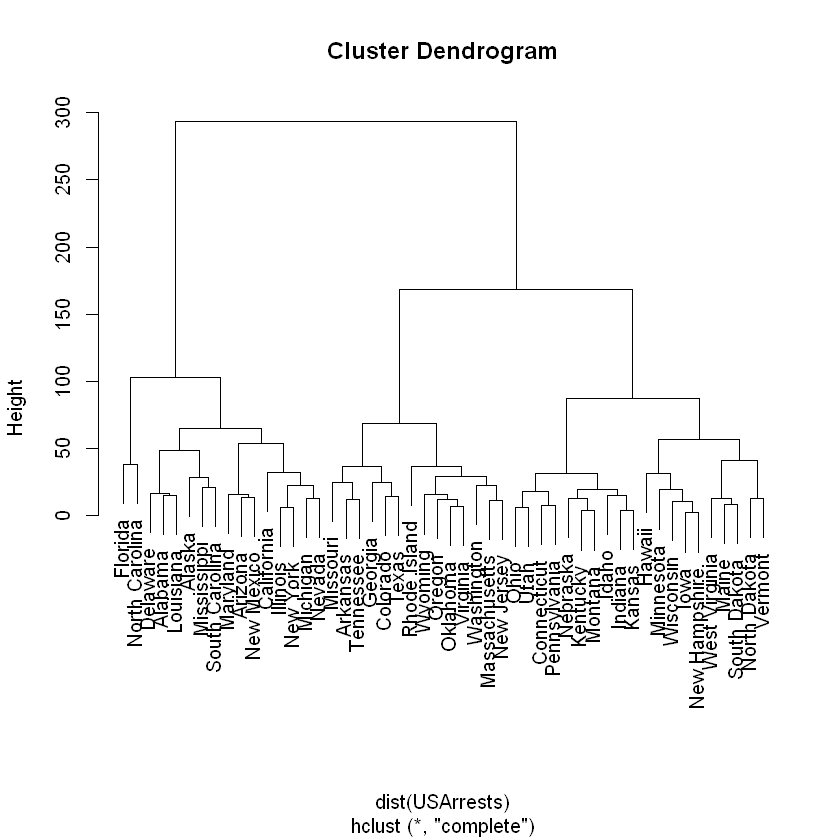

In [23]:
hc.complete = hclust(dist(USArrests), method="complete")
plot(hc.complete)

In [ ]:
# (b) Cut the dendrogram at a height that results in three distinct
# clusters. Which states belong to which clusters?

In [24]:
cutree(hc.complete, 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              1              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              3              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              3              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             1              1              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             2              2              3              2              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              2              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             2              2              3              3              2

In [ ]:
# (c) Hierarchically cluster the states using complete linkage and Euclidean
# distance, after scaling the variables to have standard deviation
# one


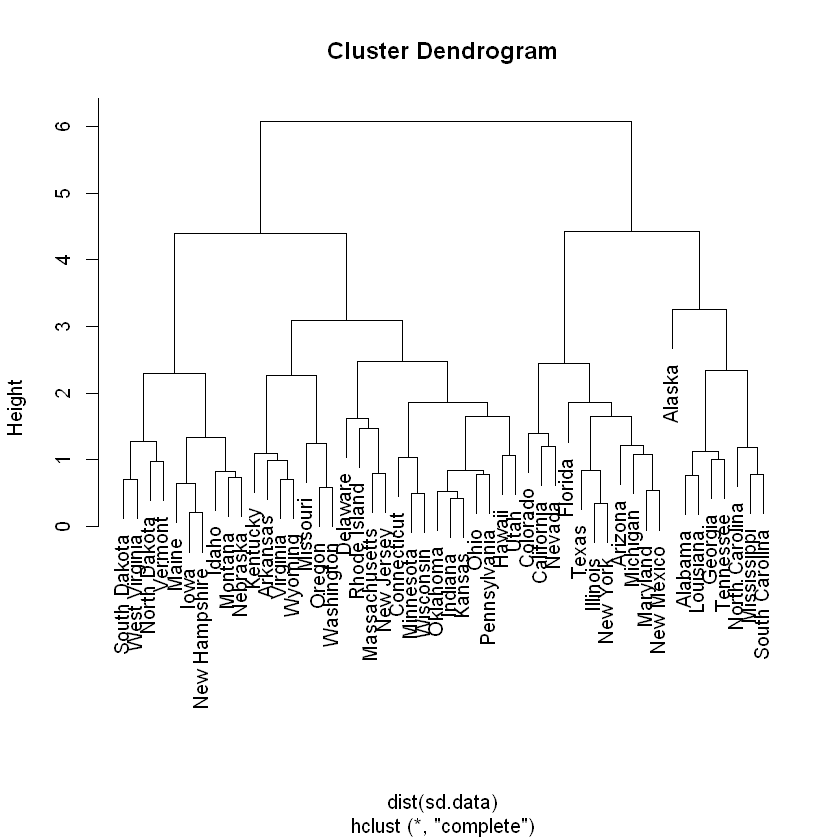

In [25]:
sd.data <- scale(USArrests)
hc.complete.sd <- hclust(dist(sd.data), method = "complete")
plot(hc.complete.sd)

In [ ]:
# (d) What effect does scaling the variables have on the hierarchical
# clustering obtained? In your opinion, should the variables be
# scaled before the inter-observation dissimilarities are computed?
# Provide a justification for your answer.

In [26]:
cutree(hc.complete.sd, 3)
#The difference when you scaled the variable are minimal, there is not enough evidence to support that we should apply it to increase the performance

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              2              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              2              3              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              2              3              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             2              2              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             3              3              3              3              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              1              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              3              3              3

In [ ]:
# 10. In this problem, you will generate simulated data, and then perform
# PCA and K-means clustering on the data.
# (a) Generate a simulated data set with 20 observations in each of
# three classes (i.e. 60 observations total), and 50 variables.
# Hint: There are a number of functions in R that you can use to
# generate data. One example is the rnorm() function; runif() is
# another option. Be sure to add a mean shift to the observations
# in each class so that there are three distinct classes.

In [1]:
set.seed(123)
x = matrix(rnorm(20*3*50, mean=0, sd=0.001), ncol=50)
x[1:20, 2] = 0
x[21:40, 1] = 1
x[21:40, 2] = 0
x[41:60, 1] = 1

In [3]:
# Perform PCA on the 60 observations and plot the first two principal
# component score vectors. Use a different color to indicate
# the observations in each of the three classes. If the three classes
# appear separated in this plot, then continue on to part (c). If
# not, then return to part (a) and modify the simulation so that
# there is greater separation between the three classes. Do not
# continue to part (c) until the three classes show at least some
# separation in the first two principal component score vectors.

In [8]:
pca.model = prcomp(x)
pca.model$x[,1:2]

PC1,PC2
-0.6672754,-1.219306e-03
-0.6669441,-2.718822e-03
-0.6651565,-1.430487e-03
-0.6666441,9.643270e-04
-0.6665848,-1.887955e-03
-0.6649970,1.372638e-03
-0.6662544,8.255212e-04
-0.6679810,1.466243e-04
-0.6674034,1.092005e-03
-0.6671598,2.360976e-03


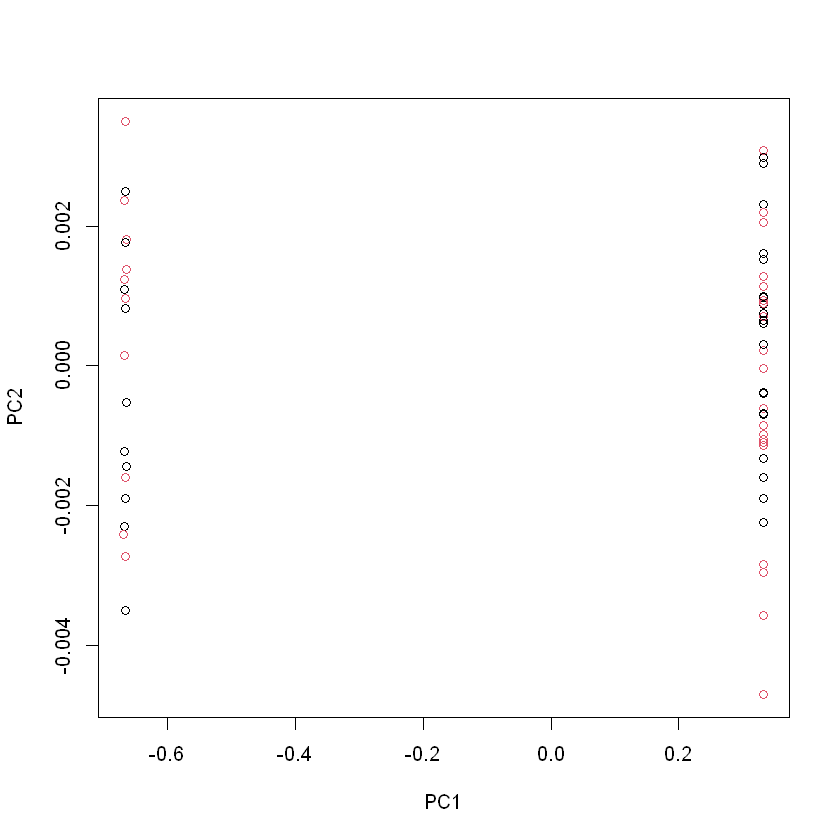

In [12]:
plot(pca.model$x[,1:2], col=1:2, xlab="PC1", ylab="PC2") 

In [13]:
# (c) Perform K-means clustering of the observations with K = 3.
# How well do the clusters that you obtained in K-means clustering
# compare to the true class labels?
# Hint: You can use the table() function in R to compare the true
# class labels to the class labels obtained by clustering. Be careful
# how you interpret the results: K-means clustering will arbitrarily
# number the clusters, so you cannot simply check whether the true
# class labels and clustering labels are the same.


ERROR: Error in parse(text = x, srcfile = src): <text>:1:5: unexpected symbol
1: (c) Perform
        ^


In [14]:
km.model = kmeans(x, 3, nstart=10)
table(km.model$cluster, c(rep(1,20), rep(2,20), rep(3,20)))
#we got no good predictions on 1 and 2 variables, on third we gor less than half of the predictions

   
     1  2  3
  1  0 11  8
  2 20  0  0
  3  0  9 12

In [ ]:
# (d) Perform K-means clustering with K = 2. Describe your results.

In [15]:
km.model = kmeans(x, 2, nstart=10)
table(km.model$cluster, c(rep(1,20), rep(2,20), rep(3,20)))
#With k2 our predictions for 1 and 2 are a perfect match byt we got no predicions for variable 3

   
     1  2  3
  1 20  0  0
  2  0 20 20

In [ ]:
# (e) Now perform K-means clustering with K = 4, and describe your
# results.

In [16]:
km.model = kmeans(x, 4, nstart=10)
table(km.model$cluster, c(rep(1,20), rep(2,20), rep(3,20)))

   
     1  2  3
  1 20  0  0
  2  0  5 11
  3  0 11  3
  4  0  4  6

In [ ]:
# (f) Now perform K-means clustering with K = 3 on the first two
# principal component score vectors, rather than on the raw data.
# That is, perform K-means clustering on the 60 × 2 matrix of
# which the first column is the first principal component score
# vector, and the second column is the second principal component
# score vector. Comment on the results.

In [18]:
km.model = kmeans(x[,1:2], 3, nstart=10)
table(km.model$cluster, c(rep(1,20), rep(2,20), rep(3,20)))
#we got only accurate predictions for var 3 and 60% of var 1

   
     1  2  3
  1  8  0  0
  2 12  0  0
  3  0 20 20

In [ ]:
# (g) Using the scale() function, perform K-means clustering with
# K = 3 on the data after scaling each variable to have standard
# deviation one. How do these results compare to those obtained
# in (b)? Explain.

In [19]:
km.model = kmeans(scale(x), 3, nstart=10)
table(km.model$cluster, c(rep(1,20), rep(2,20), rep(3,20)))

   
    1 2 3
  1 7 8 9
  2 9 5 5
  3 4 7 6